**Definition of the Halvorsen Attractor:**

$\dot{x}=-ax-4y-4z-y^2$  with  $\dot{x},\dot{y},\dot{z}=\frac{d x}{dt},\frac{d y}{dt},\frac{d z}{dt}$

$\dot{y}=-ay-4z-4x-z^2$

$\dot{z}=-az-4x-4y-x^2$

where

$a=1.4$

Initial conditions:

$xs=1$

$ys=0$

$zs=0$


In [1]:
from matplotlib.animation import PillowWriter
import matplotlib.animation as animation
from IPython.display import HTML, Image
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

a=1.4

xs,ys,zs=(1,0,0)

tmax=1000

Definition of the Function:

In [2]:
def Halvorsen(t,X,a):
    
    x, y, z = X                           
    x_dot = -a*x-4*y-4*z-y**2
    y_dot = -a*y -4*z -4*x-z**2
    z_dot = -a*z-4*x-4*y-x**2
    
    return x_dot, y_dot, z_dot
    
soln =solve_ivp(Halvorsen,(0,tmax),(xs, ys, zs),  args=(a,), dense_output=True)


Interpolation for plotting:

In [3]:

t_4_interpolation=np.linspace(0,1000,100000)

print(soln.sol(t_4_interpolation).shape)         

x,y,z=soln.sol(t_4_interpolation)


(3, 100000)


**Static 3D-Plot**

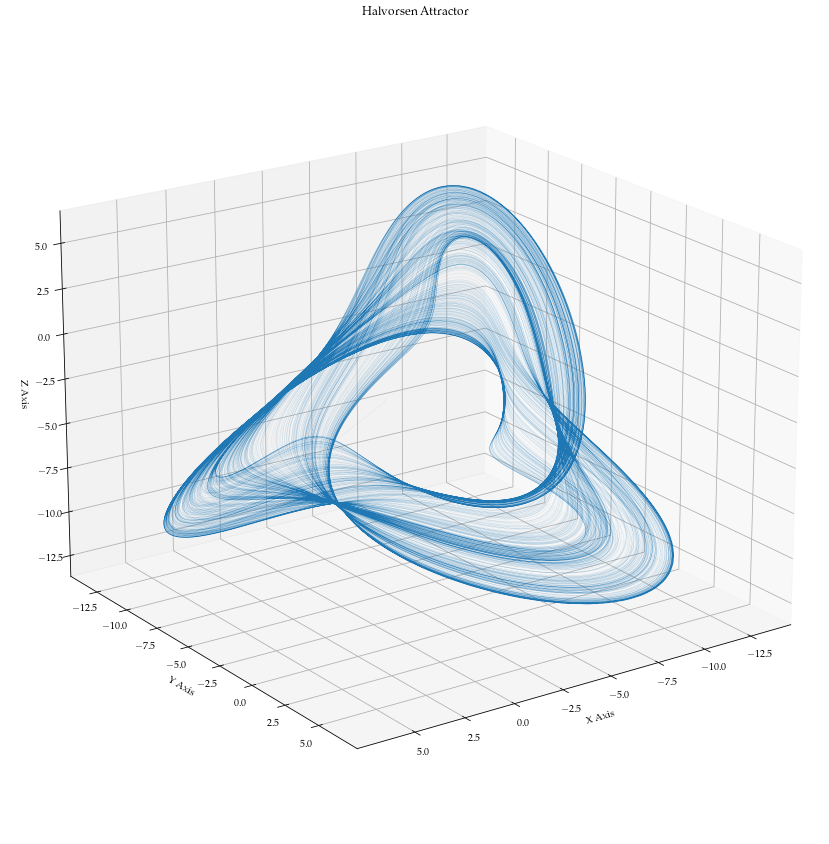

In [4]:
#%matplotlib notebook
fig = plt.figure(figsize=(21,15))
ax = fig.gca(projection='3d')
ax.view_init(20, 55)
ax.plot(x, y, z, lw=0.05)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Halvorsen Attractor")


plt.show()

In [5]:
soln.sol(t_4_interpolation).T.shape

(100000, 3)

Solution vectors declaration (to be charged)

In [6]:
xt = np.zeros(len(t_4_interpolation))
yt = np.zeros(len(t_4_interpolation))
zt = np.zeros(len(t_4_interpolation))

**Body of the Animation**

<IPython.core.display.Javascript object>


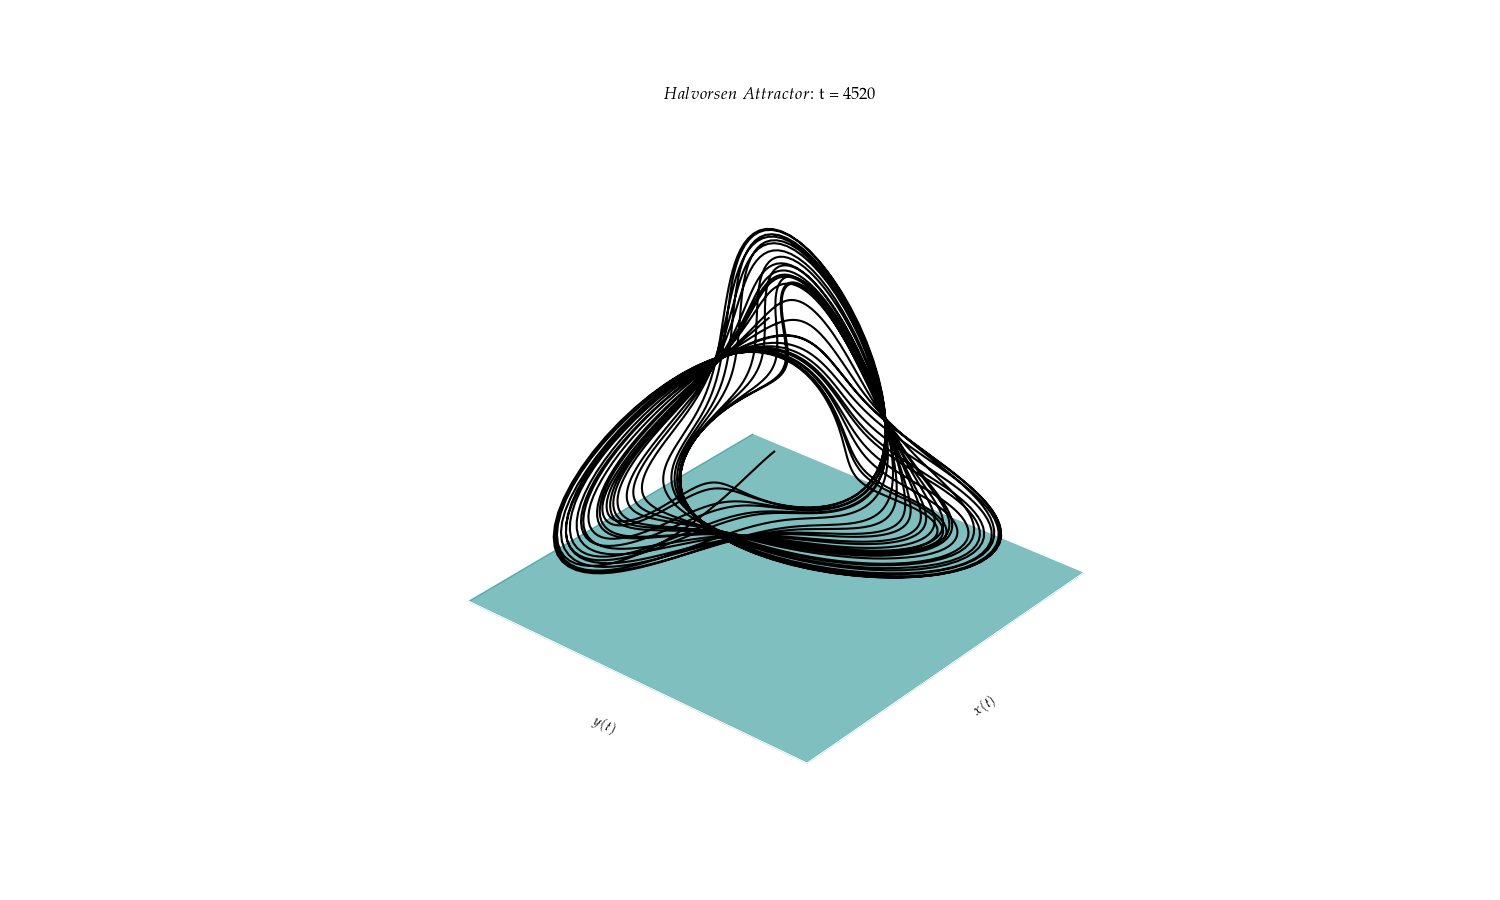

In [7]:
%matplotlib notebook
plt.style.use(['dark_background'])

fig = plt.figure(figsize = (15, 9), dpi = 80) #(12, 6); (12, 7); (14, 9)
ax = fig.add_subplot(projection = '3d')
ax.view_init(30, -10) #20,-20
fig.set_facecolor('w')
ax.set_facecolor('w')


ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False



ax.w_xaxis.set_pane_color((0.0, 0.5, 0.5, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.5, 0.5, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.5, 0.5, 0.5))




def update(i):
    xt[i] = soln.sol(t_4_interpolation).T[i][0]
    yt[i] = soln.sol(t_4_interpolation).T[i][1]
    zt[i] = soln.sol(t_4_interpolation).T[i][2]
    ax.clear()
    ax.view_init(30, -10 + i/4)
    ax.plot(xt[:i], yt[:i], zt[:i], 'black')
    ax.set_title('$Halvorsen~Attractor$: t = ' + str(i), color = 'k', fontsize = 12)
    ax.set_xlabel('$x(t)$', color = 'k', fontsize = 10)
    ax.set_ylabel('$y(t)$', color = 'k', fontsize = 10)
    #ax.set_zlabel('$z(t)$', color = 'g')
    
    
    ax.grid(False)
    
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.w_zaxis.line.set_lw(0.)
    ax.set_zticks([])
    
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])


ani = animation.FuncAnimation(fig, update, np.arange(100000), interval = 20, repeat = False)

plt.show()